<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/VisionComputacional/blob/main/L07_RedesConvolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visión Computacional
## Dr. Carlos Villaseñor
## Lección 7 - Redes Neuronales convolucionales


Primeramente importamos unos paquetes

In [2]:
# Importamos numpy y matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Importamos lo necesario para crear la red
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

# Importamos unos paquetes de sklearn para comprobar el modelo
from sklearn.metrics import classification_report, confusion_matrix

Cargamos el dataset de MNIST

In [3]:
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

Mostrartemos un ejemplo de manera aleatoria

Text(0.5, 1.0, 'Label: 5')

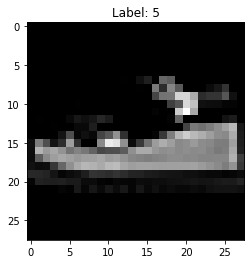

In [4]:
sample = np.random.randint(0,60000)
plt.imshow(xtrain[sample], cmap=plt.cm.gray)
plt.title('Label: ' + str(ytrain[sample]))

In [5]:
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

if backend.image_data_format() == 'channels_first':
    xtrain = xtrain.reshape(xtrain.shape[0], 1, 28, 28)
    xtest = xtest.reshape(xtest.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
    xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

print(xtrain.shape)
print(input_shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [6]:
print(ytrain[0])
ytrain = keras.utils.to_categorical(ytrain, 10)
print(ytrain[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
def build_model():
  model = Sequential()

  model.add(Conv2D(32,kernel_size=(3,3),
                   activation='relu',
                   input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss = keras.losses.categorical_crossentropy,
                optimizer = 'adam',
                metrics=['accuracy'])
  return model

In [8]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [9]:
model.fit(xtrain, ytrain, batch_size=256, epochs=12, verbose=1,
          validation_split=0.17)

Epoch 1/12
195/195 [==============================] - 53s 257ms/step - loss: 1.1325 - accuracy: 0.5688 - val_loss: 0.6653 - val_accuracy: 0.7505

In [13]:
ypred=model.predict(xtest)
print('Salida de la red:\n', ypred[0])

Salida de la red:
 [9.27055964e-07 7.16113163e-07 2.55473278e-08 4.04062393e-06
 1.05858426e-07 7.67476507e-04 1.21916526e-06 2.38901693e-02
 3.02899275e-06 9.75332320e-01]


In [14]:
ypred = np.argmax(ypred, axis=1)
print('Predicciones:\n', ypred)

Predicciones:
 [9 2 1 ... 8 1 5]


In [15]:
print('Reporte de clasificación:\n', classification_report(ytest, ypred))
print('Matriz de confusión:\n', confusion_matrix(ytest, ypred))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.84      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.76      0.82      0.79      1000
           5       0.99      0.94      0.96      1000
           6       0.71      0.53      0.60      1000
           7       0.92      0.95      0.93      1000
           8       0.96      0.98      0.97      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Matriz de confusión:
 [[863   1  36  34   5   1  45   0  15   0]
 [  1 965   2  23   5   0   1   0   3   0]
 [ 13   0 845  12  76   0  51   0   3   0]
 [ 20   7  25 887  32   0  28   0   0   1]
 [  3   0  62  24 81

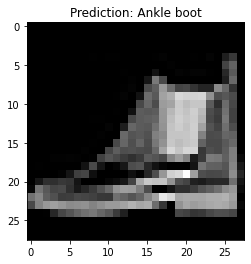

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample = np.random.randint(0,10000)
x = xtest[sample].reshape(28,28)
plt.imshow(x, cmap=plt.cm.gray)
plt.title('Prediction: ' + class_names[ypred[sample]])
plt.show()